In [56]:
# On importe les librairies
import numpy as np
import matplotlib.pyplot as plt

We want to estimate parameters of a simple linear regression (y i = wx i + b) by closed-form and GD. 

The loss function is defined on a data point by l(ŷ i , y i ) = (ŷ i − y i )² where the prediction is given by ŷ i = ŵx + b̂. The
P N
optimization problem we want to solve is min i=1 l(ŷ i , y i ). 

We assume the following data generation process:
w,b
Y ∼ wX + b + \eta where X ∼ U[20; 40] and \eta ∼ N (0, 1).

# 1

Generate N data points (x i , y i ) using the data generation process given above and store them into x vs
N
y. Note: N = 100 and start by first generating {x i } N
1 and then {y i } 1 . Do not forget to add noise!

D'abord on va générer les x

In [57]:
# On génère les x
list_x = np.random.uniform(20, 40, 100)

# Pis les y

def y(x):
    w = 1.5
    b = 5
    return w * x + b + np.random.normal(0,1)

list_y = [y(x) for x in list_x ]


# 2
Plot the data points x vs y.

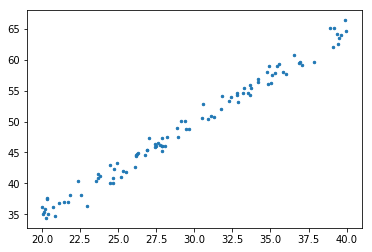

In [58]:
plt.scatter(list_x, list_y, s=6)

# 3
Estimate parameters of the simple linear regression by closed-form. Note: store these values into w_cf
and b_cf.

In [100]:
# D'abord, on doit transposer nos donner pour pouvoir les utiliser dans le calcul matriciel
# Donc on génère une liste de 1 qu'on va nsuit coller à notre liste de x

list_1 = np.ones(len(list_x))


# Pis on colle les deux

X = np.stack((list_1, list_x), axis=1)

# Enfin, on fait notre calcul de ouf

def B(y):  
    X_T = np.transpose(X)
    prod = np.dot(X_T, X)
    inv = np.linalg.inv(prod)
    return np.dot(inv, np.dot(X_T,y))

Y = np.asarray(list_y)
beta = B(Y)

# 8
Create a function loss(x_i, y_i, w, b) which is computing the regression loss on the full dataset.
What is the value of loss([1], [3], 1, 2) ?

In [101]:
# On détermine la fonction de coût

def loss(x_i, y_i, w, b):
    return ((w * x_i) + b - y_i)**2

loss(1, 3, 1, 2)

0

In [102]:
def dl_dw(xi, yi, w, b):
    return -2 * xi * ( yi - (w * xi + b))

dl_dw(4, -1, 0, 0)

8

In [103]:
def dl_db(xi, yi, w, b):
    return -2 * ( yi - (w * xi + b))

dl_db(4, -1, 0, 0)

2

# 11
Implement a function update_w_and_b(x_i, y_i, w, b, lr) which is updating w and b according to the gradient compute on the full data points. What is the output of the following command of update_w_and_b([0], [3], 5, 3, 0.1) and why?

In [109]:
def update_w_and_b(x, y, w, b, lr):
    grad_w = 0
    grad_b = 0
    
    N = len(y)
    
    for t in range(N):
        grad_w += dl_dw(x[t], y[t], w, b)
        grad_b += dl_db(x[t], y[t], w, b)
        
    # update
    w -= (1 / float(N)) * grad_w * lr
    b -= (1 / float(N)) * grad_b * lr
        
    return w, b
        
update_w_and_b([0], [3], 5, 3, 0.1)

(5.0, 3.0)

# 12 
Estimate parameters of the simple linear regression by gradient descent from a random initialization of
w and b and with a leanring rate equals to 0.001. Note: store these values into w_gd and b_gd.

[array([   8.46732643, -634.60911809]), array([  8.46732643, -20.74489117])]

In [ ]:
# Maintenant on voit comment régler ça en 3 lignes

from sklearn.linear_model import LinearRegression
...
